<a href="https://colab.research.google.com/github/MurariPavanSai/Unsupervised_Face_Classification/blob/main/Unsupervised_Face_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn #Installing Multi-Task Cascaded Convolutional Neural Network, or MTCNN, for face detection.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 8.4 MB/s 


In [ ]:
# example of loading the keras facenet model
from keras.models import load_model
# load the model
model = load_model('/content/drive/MyDrive/facenet_keras.h5')
# summarize input and output shape
print(model.inputs)
print(model.outputs)

[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [ ]:
# demonstrate face detection on 5 Celebrity Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
import cv2
import matplotlib.pyplot as plt

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# varible for dectecting face
	t=0
	try :

	# extract the bounding box from the first face
		x1, y1, width, height = results[0]['box']
	# bug fix
		x1, y1 = abs(x1), abs(y1)
		x2, y2 = x1 + width, y1 + height
		# extract the face
		face = pixels[y1:y2, x1:x2]
		# resize pixels to the model size
		image = Image.fromarray(face)
		image = image.resize(required_size)
		face_array = asarray(image)
		# changing the variable when we detect a face
		t=1

	except:
		t=0
	if(t==1):
		# returning face_array if we have image
		face_array=asarray(image)
	else:
		# returning 0 if we cant find any face
		face_array=0
	return face_array


In [ ]:
# get the face embedding for one face
import numpy as np
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = np.expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]

In [ ]:
# reading the annotations excel sheet that given in dataset
import pandas as pd
# reading the excel sheet
ant = pd.read_excel("/content/drive/MyDrive/(English translate)20210426_image_classification_Imbesideyou.xlsx", skiprows=1)

ant.drop(["Unnamed: 0"], axis=1, inplace=True)
#deleting the masked faces
ant["is_mask"]=ant['Mask: Y/N\n"-" is not for face images']
del ant['Mask: Y/N\n"-" is not for face images']
ant

,NO,File name,Person ID,is_mask
0,1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N
1,2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N
2,3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N
3,4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N
4,5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N
...,...,...,...,...
57893,57894.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,2.0,N
57894,57895.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,0.0,-
57895,57896.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,0.0,-
57896,57897.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...,1.0,N


In [ ]:
#taking the photos of unmasked
final_ant=ant[ant["is_mask"]=="N"]
final_ant

,NO,File name,Person ID,is_mask
0,1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N
1,2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N
2,3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N
3,4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N
4,5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N
...,...,...,...,...
57891,57892.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,1.0,N
57892,57893.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,4.0,N
57893,57894.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003941_...,2.0,N
57896,57897.0,ac0abb38-d3ff-400a-b710-7bdcbb7c366d_00003942_...,1.0,N


In [ ]:
#Taking the photos of 50 of each person
some = pd.DataFrame()
for i in range(1,5):
  some = pd.concat([some, final_ant[final_ant["Person ID"]==i].iloc[:50,:]])
some

,NO,File name,Person ID,is_mask
0,1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N
1,2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N
2,3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N
3,4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N
4,5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N
...,...,...,...,...
419,420.0,187dcd69-e620-46b5-b40e-78020096caf4_00001102_...,4.0,N
421,422.0,187dcd69-e620-46b5-b40e-78020096caf4_00001103_...,4.0,N
424,425.0,187dcd69-e620-46b5-b40e-78020096caf4_00001104_...,4.0,N
427,428.0,187dcd69-e620-46b5-b40e-78020096caf4_00001105_...,4.0,N


In [ ]:
embeddings = []
i=1
for path in some["File name"].values:

  print('{} /200'.format(i))
  #takinhg the path according to given dataset

  if(path[0]=='a'):
    path ='/content/drive/MyDrive/faceimage/f5845e49-256f-4d70-9214-47bd5358c9d1/'+path
  if(path[0]=='1'):
    path ='/content/drive/MyDrive/faceimage/a055a66f-46ea-4c57-8de4-f3cc4f27c59c/'+path
  if(path[0]=='4'):
    path='/content/drive/MyDrive/faceimage/dd40a338-faf9-481d-996c-6fe0f648d0b7/'+path
    #extracting image

  img = extract_face(path)
  i+=1
  try:
    #getting embeddings
    embed = get_embedding(model, img)
    embeddings.append(embed)
  except:
    #if not getting null array
    embeddings.append(np.zeros(128))

some["embeddings"] = embeddings

1 /200
1/1 [==============================] - 2s 2s/step
2 /200


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 100ms/step
3 /200
1/1 [==============================] - 0s 96ms/step
4 /200
1/1 [==============================] - 0s 94ms/step
5 /200
1/1 [==============================] - 0s 95ms/step
6 /200
1/1 [==============================] - 0s 93ms/step
7 /200
1/1 [==============================] - 0s 99ms/step
8 /200
1/1 [==============================] - 0s 92ms/step
9 /200
1/1 [==============================] - 0s 93ms/step
10 /200
1/1 [==============================] - 0s 92ms/step
11 /200
1/1 [==============================] - 0s 96ms/step
12 /200
1/1 [==============================] - 0s 93ms/step
13 /200
1/1 [==============================] - 0s 92ms/step
14 /200
1/1 [==============================] - 0s 93ms/step
15 /200
1/1 [==============================] - 0s 90ms/step
16 /200
1/1 [==============================] - 0s 94ms/step
17 /200
1/1 [==============================] - 0s 97ms/step
18 /200
1/1 [==============================] - 0s 91ms

In [ ]:
some

,NO,File name,Person ID,is_mask,embeddings
0,1.0,187dcd69-e620-46b5-b40e-78020096caf4_00000850_...,1.0,N,"[1.7467982, -1.6566137, 0.30627072, -0.7331273..."
1,2.0,187dcd69-e620-46b5-b40e-78020096caf4_00000851_...,1.0,N,"[1.6958401, -1.940258, 0.31737342, -0.8369104,..."
2,3.0,187dcd69-e620-46b5-b40e-78020096caf4_00000852_...,1.0,N,"[1.5409249, -1.9422443, 0.40655246, -0.7987442..."
3,4.0,187dcd69-e620-46b5-b40e-78020096caf4_00000853_...,1.0,N,"[1.6068307, -1.8420751, 0.2452985, -0.9344003,..."
4,5.0,187dcd69-e620-46b5-b40e-78020096caf4_00000854_...,1.0,N,"[1.6573381, -1.7460661, 0.53604245, -0.8992884..."
...,...,...,...,...,...
419,420.0,187dcd69-e620-46b5-b40e-78020096caf4_00001102_...,4.0,N,"[0.08334644, -1.9905313, -2.1893773, 0.5879236..."
421,422.0,187dcd69-e620-46b5-b40e-78020096caf4_00001103_...,4.0,N,"[0.0005387813, -2.0621805, -2.0986292, 0.61403..."
424,425.0,187dcd69-e620-46b5-b40e-78020096caf4_00001104_...,4.0,N,"[0.24594083, -1.8213687, -2.3543773, 0.5461088..."
427,428.0,187dcd69-e620-46b5-b40e-78020096caf4_00001105_...,4.0,N,"[-0.01592736, -1.8696147, -2.6281226, 0.776402..."


In [ ]:
from sklearn.cluster import DBSCAN
#DBSCAN implementation
db = DBSCAN(eps = 6, min_samples=8).fit(embeddings)
#filling labels
some["cluster_labels"] = db.labels_
#checking
set(some["cluster_labels"]), len(some["cluster_labels"])

({-1, 0, 1, 2, 3}, 200)

In [ ]:
for i in range(4):
  print(sum(cluster_labels==i))
print(sum(cluster_labels==-1))

50
48
40
50
12


Class 0


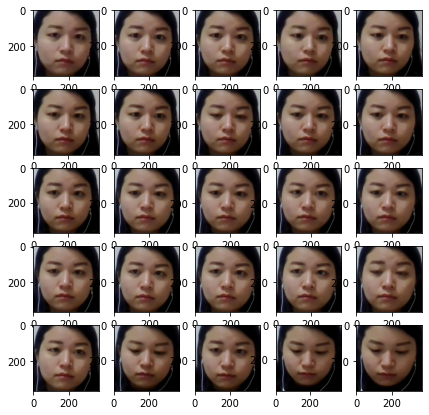

Class 1


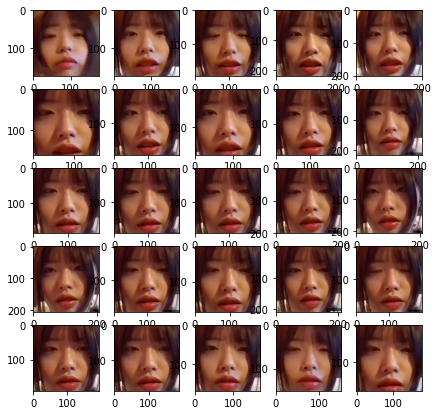

Class 2


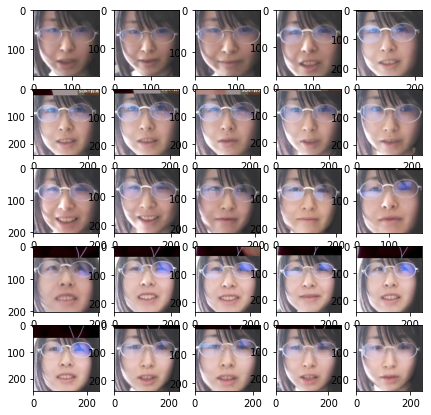

Class 3


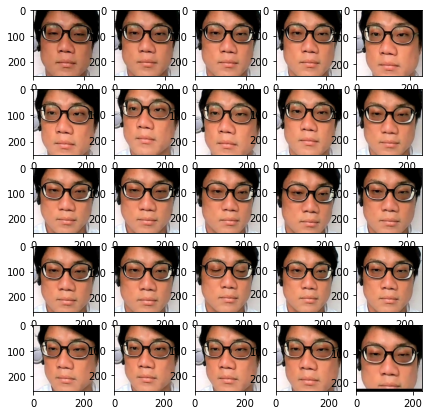

Class -1


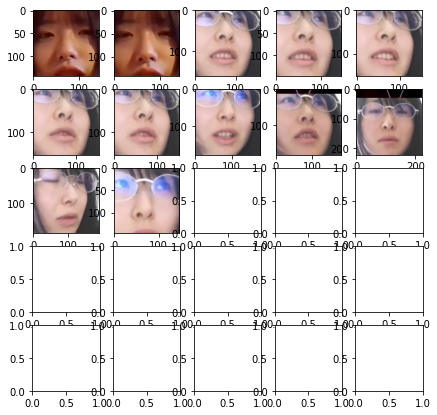

In [ ]:
labels = set(some["cluster_labels"].values)
for i in labels:
  #ploting images
  fig, ax = plt.subplots(5,5,figsize=(7,7))
  ax = ax.flatten()
  paths = (some[some["cluster_labels"]==i])["File name"].values
  print("Class", i)
  for j in range(25):
    if j<len(paths):
      path = paths[j]
      if(path[0]=='a'):
        path ='/content/drive/MyDrive/faceimage/f5845e49-256f-4d70-9214-47bd5358c9d1/'+path
      if(path[0]=='1'):
        path ='/content/drive/MyDrive/faceimage/a055a66f-46ea-4c57-8de4-f3cc4f27c59c/'+path
      if(path[0]=='4'):
        path='/content/drive/MyDrive/faceimage/dd40a338-faf9-481d-996c-6fe0f648d0b7/'+path
      im = cv2.imread(path)
      im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
      ax[j].imshow(im)
  plt.show()